# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Não Supervisionada
## Projeto 3: Criando Segmentos de Clientela

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.cm as cm

from IPython.display import display, SVG, HTML
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
%matplotlib inline

try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print ("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

# Display a description of the dataset
display(data.describe())

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Explorando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'** (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene, Padaria/Frios). Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [2]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [3]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = [23,25,27]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,16165,4230,7595,201,4003,57
2,14276,803,3045,485,100,518


### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
 - Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?

**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:**
Suponho que C0(Primeira coluna) seria um supermercado focado em produtos de comida. Pelos seguintes motivos:
-O grande número de produtos com grandes valores
-a diferença gritante entre produtos relacionados a laticínios e bebidas.

C1 (Segunda coluna) seria algo relacionado a um mercado de vizinhança.
-valores das mercadorias proximas á média.

C2(Terceira coluna) Trata-se de um estabelecimento comercial como um café ou cafeteria.
- tem um excesso nas mercadorias de refresco
-'Frozen', 'Grocery', 'Milk', 'Detergents_Paper' são bem pequenos.
- 'Detergents_Paper' São muito pequenos.

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

The correlation table for the choosen feature 'Grocery'
Training and testing split was successful.
Decision Tree Regressor. The score of the prediction using the testing set is 0.7957683115761958.
Random Forest Regressor. The score of the prediction using the testing set is 0.8454561694902754.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


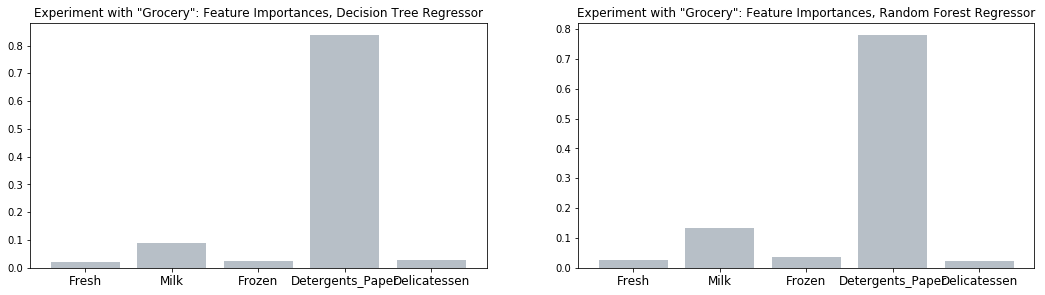

In [4]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.cm as cm

from IPython.display import display, SVG, HTML
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
%matplotlib inline

import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
new_data = data.drop('Grocery', axis = 1)
target = data['Grocery']
new_data_target = pd.concat([new_data, target], axis = 1)
# Display the correlation table for the given feature
print ("The correlation table for the choosen feature 'Grocery'")
pearson = new_data_target.corr(method='pearson')
corr_with_grocery = pearson.iloc[-1][:-1]
corr_with_grocery[abs(corr_with_grocery).argsort()[::-1]]
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size = 0.25, random_state = 1)

print ("Training and testing split was successful.")

# Create a decision tree regressor and random forest regressor fit them to the training set
regressor1 = DecisionTreeRegressor(random_state=1)
regressor1.fit(X_train, y_train)
regressor2 = RandomForestRegressor(random_state=1)
regressor2.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score1 = regressor1.score(X_test, y_test)
print("Decision Tree Regressor. The score of the prediction using the testing set is {}.".format(score1))
score2 = regressor2.score(X_test, y_test)
print("Random Forest Regressor. The score of the prediction using the testing set is {}.".format(score2))

D1 = dict(zip(new_data, regressor1.feature_importances_))
D2 = dict(zip(new_data, regressor2.feature_importances_))
plt.figure(figsize=(18,4.5))

plt.subplot(121)
plt.bar(range(len(D1)), D1.values(), alpha=0.5, color='slategrey', align='center')
plt.xticks(range(len(D1)), D1.keys(), fontsize=12)
plt.title('Experiment with "Grocery": Feature Importances, Decision Tree Regressor')

plt.subplot(122)
plt.bar(range(len(D2)), D2.values(), alpha=0.5, color='slategrey', align='center')
plt.xticks(range(len(D2)), D2.keys(), fontsize=12)
plt.title('Experiment with "Grocery": Feature Importances, Random Forest Regressor');

### Questão 2
- Qual atributo você tentou prever?
- Qual foi a pontuação da previsão reportada?
- Esse atributo é necessário para identificar os hábitos de compra dos clientes?

**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados. Se você obter um score baixo para um atributo em particular, isso nos faz acreditar que aquele ponto de atributo é difícil de ser previsto utilizando outros atributos, sendo assim um atributo importante quando considerarmos a relevância.

**Resposta:**
Escolhi Grocery pois o score para predictiions foi de 0.7958. Esse dado tem uma forte relação com pelo menos dois outros dados(Milk e Detergents_paper). Assim, fica facil de prever os valores de 'grocery'aplicando um simples regressor de árvores de decisão. Um Random Forest mostra resultados melhores e confirma as pré-definições. 

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


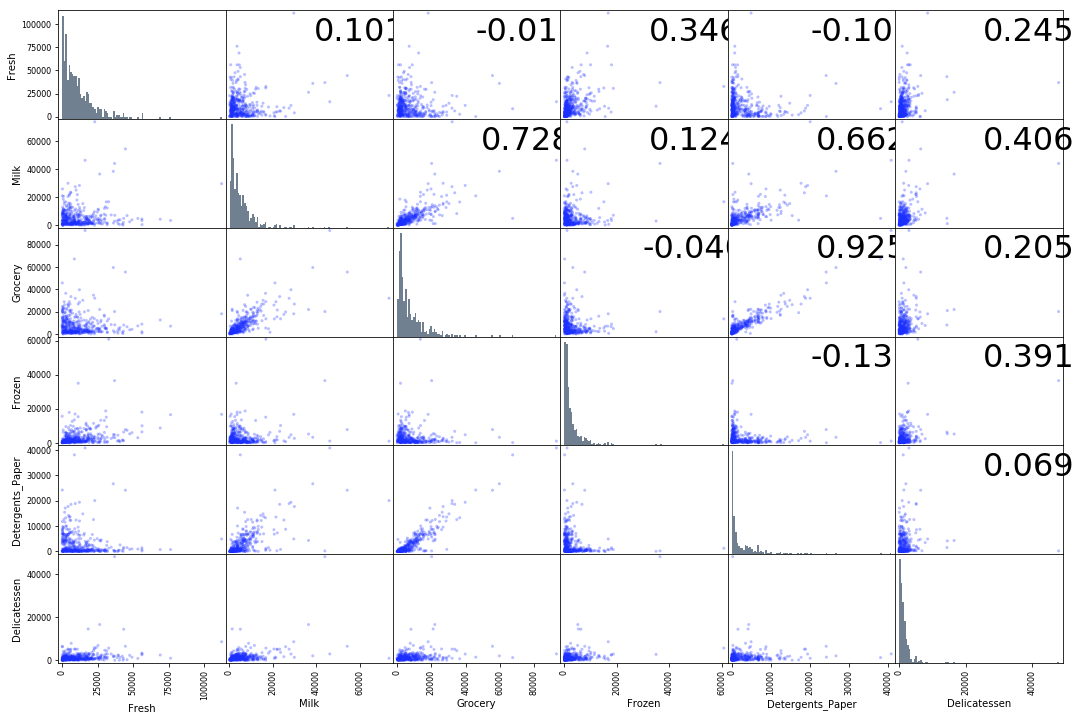

In [5]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (18,12), diagonal = 'hist',
                                  c='#1b2fff', hist_kwds={'color':'SlateGrey', 'bins':100})
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), fontsize=32, xycoords='axes fraction', ha='center', va='center');

### Questão 3:

- Usando a matriz de dispersão como referência, discuta a distribuição da base de dados. Elabore sua resposta considerando a normalidade, _outliers_, a grande quantidade de pontos próximo de 0 e outras coisas que julgar importante. Se necessário, você pode realizar outros plots para complementar sua explicação.
- Há algum par de atributos que mostra algum grau de correlação?
- Como isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever?
- Como os dados desses atributos são distribuidos?

**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos estão? Você pode usar [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) para ver a correlação dos atributos e visualiza-los utilizando um [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(os dados que alimentam o heatmap seriam as correlações, por exemplo `data.corr()`)

**Resposta:**
O maior grau de relação está atrelado ao par 'Detergents' e 'Grocery' (0.9246).  Há outros com boas correlações também, porém este é o melhor. ESte fato confirma a relevância dos dados que tentamos prever.

Deve-se notar que as amostras não são distribuidas normalmente. No entanto, a distribuição log-normal aparenta muito similar com as características. De acordo com o exemplo da distribuição log-normal, pode-se perceber a semelhança.

http://wiki.analytica.com/index.php?title=Log-normal_distribution

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


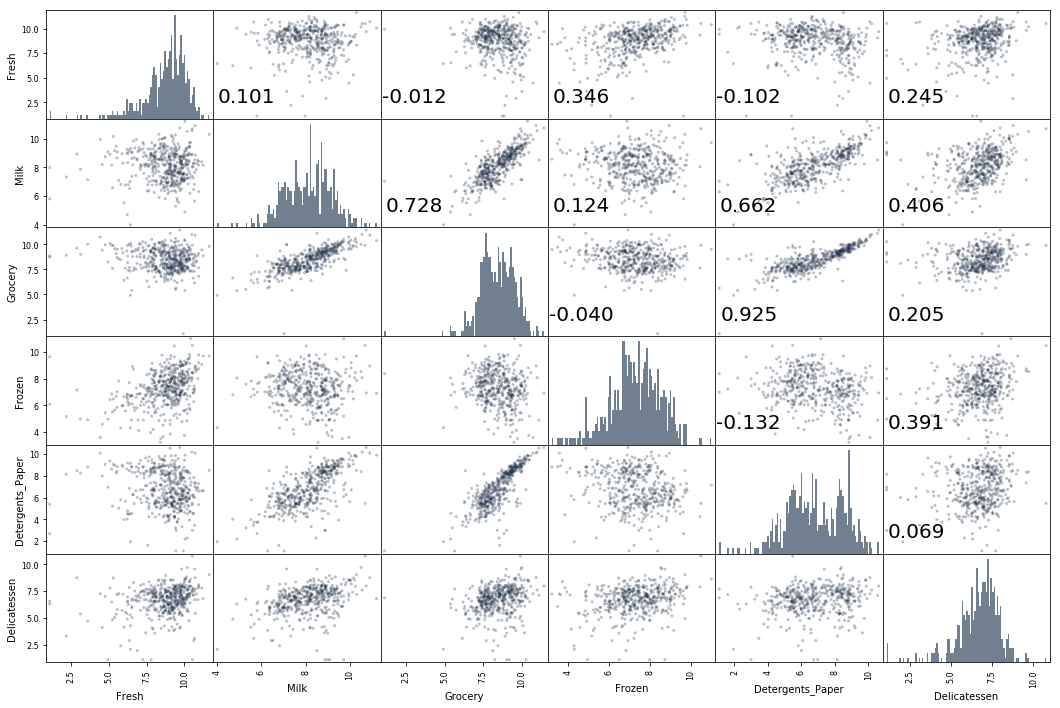

In [6]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = np.log(data)

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = np.log(samples)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
axes = pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (18,12), diagonal = 'hist',
                                  c='#1b2c45', hist_kwds={'color':'SlateGrey', 'bins':100})
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.2, 0.2), fontsize=20,
                        xycoords='axes fraction', ha='center', va='center');

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [7]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,9.690604,8.349957,8.935245,5.303305,8.294799,4.043051
2,9.566335,6.688355,8.021256,6.184149,4.605170,6.249975


### Implementação: Detecção de valores atípicos (_Outlier_)
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar valores atípicos](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [8]:

# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = (Q3 - Q1) * 1.5
    
    # Mostre os discrepantes
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
outliers  = [65,66,75,128,154]
print("Data outliers: '{}'".format(outliers))
# Remova os valores atí, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data outliers: '[65, 66, 75, 128, 154]'


### Questão 4
- Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima?
- Esses pontos de dados deveriam ser removidos do conjunto?
- Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.

**Resposta:**
Cinco pontos de dados [154, 66,128, 65, 75] podem ser checados como discrepantes em mais de uma categoria.

Creio que devem ser removidos, pois se aplicar o k-menas os resultados podem ser distorcidos por pontos discrepantes. Por exemplo no calculo de cluster-centers. Neste calculo eles usam as médias de todos os pontos e dados do cluster analisado. Os discrepantes terão uma influencia negativa bem relevante. Se esses dados não forem  removidos, eles podem formar clusters adicionais.


## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado. Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

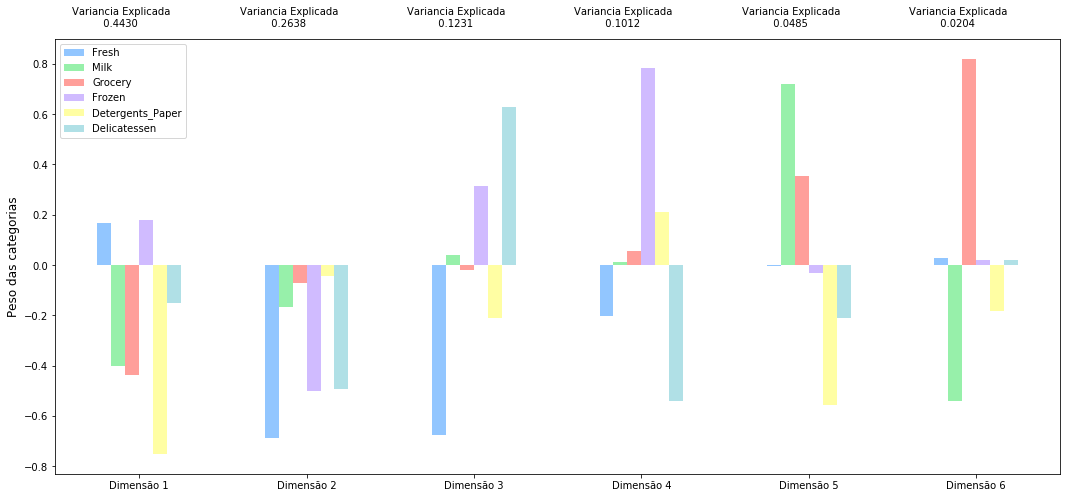

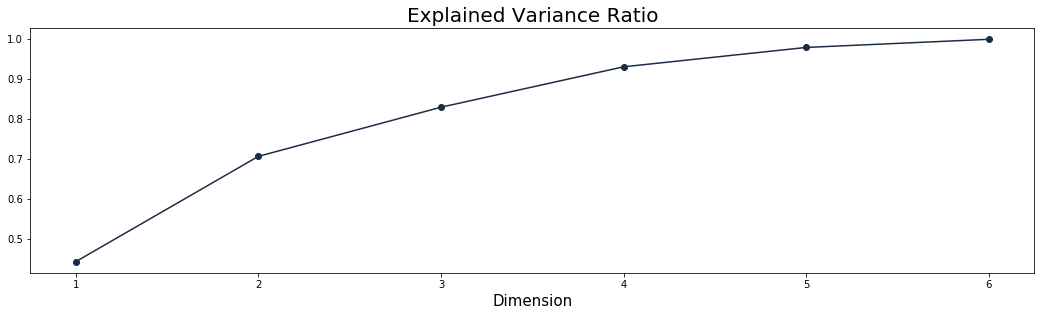

In [9]:
def pca_results(good_data, pca):
    dimensions = ['Dimensão {}'.format(i) for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Variancia'])
    variance_ratios.index = dimensions

    plt.style.use('seaborn-pastel')
    fig, ax = plt.subplots(figsize = (18,8))

    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Peso das categorias", fontsize=12)
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Variancia Explicada\n          %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=len(good_data.keys())).fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_result = pca_results(good_data, pca);

plt.figure(figsize=(18,4.5))
plt.plot(np.arange(1, 7), np.cumsum(pca.explained_variance_ratio_), '-o', c='#1b2c45')
plt.xlabel('Dimension', fontsize=15)
plt.title('Explained Variance Ratio', fontsize=20);

### Questão 5
- Quanta variância nos dados é explicada **no total** pelo primeiro e segundo componente principal?
- Quanta variância nos dados é explicada pelos quatro primeiros componentes principais?
- Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões que melhor representam em termos de despesas dos clientes. Explique qual das quatro representa melhor em termos de consumo dos clientes.

**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:**
Primeira dimensão: categorias 'Grocery', 'Milk' , 'Detergents' tem as maiores influencias, então se parece com um gasto típico em um supermercado. Nos itens anteriores foi notado que estas categorias possuem muito correlação.

Segunda dimensão: categorias 'Fresh', 'Frozen', 'Delicatessen' são as mais importantes, então podem ser gastos de restaurantes e cafés com um cardápio bem variado.

Terceira dimensão: categorias 'Fresh', 'Frozen', 'Delicatessen' são as mais importantes também mas possuem direções diferentes, portanto podem ser gastos em artigos de varejo em lojas próximas. 

Quarta categoria: categorias 'Fresh', 'Frozen', 'Delicatessen' são as mais importantes mas 'Frozen' tem a maior influencia, então pode-se dizer que seria gastos de restaurantes e cafés com um cardápio especial. 

As quatro primeiras dimensões são as que melhor representam em termos de gastos do cliente pois explicam a principal parte da variância nos gastos.

O primeiro e segundo componentes principal são explicadas: 70.679999%
Pelos quatros primeiros componentes é explicado 93.11%


### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [10]:



# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_result.index.values))

,Dimensão 1,Dimensão 2,Dimensão 3,Dimensão 4,Dimensão 5,Dimensão 6
0,-2.8096,-3.6459,1.0567,-0.5186,0.6999,-0.1811
1,-1.2292,1.5540,-3.2462,0.0043,0.1124,-0.0697
2,2.4162,0.6069,-0.7652,-1.3209,0.1614,0.8089


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [12]:

# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=2).fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em apenas duas dimensões. Observe como os valores das duas primeiras dimensões permanessem constantes quando comparados com a transformação do PCA em seis dimensões.

In [13]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.8096,-3.6459
1,-1.2292,1.5540
2,2.4162,0.6069


## Visualizando um Biplot
Um biplot é um gráfico de dispersão onde cada ponto é representado por sua pontuação junto das componentes principais. Os eixos são as componentes principais (nesse caso, `Dimension 1` e `Dimenson 2`). Além disso, o biplot mostra a projeção dos atributos originais junto das componentes. Um biplot pode nos ajudar a interpretar a redução da dimensionalidade dos dados e descobrir relacionamentos entre as componentes principais e os atributos originais.

Execute a célula abaixo para produzir um biplot com os dados de dimensionalidade reduzida.

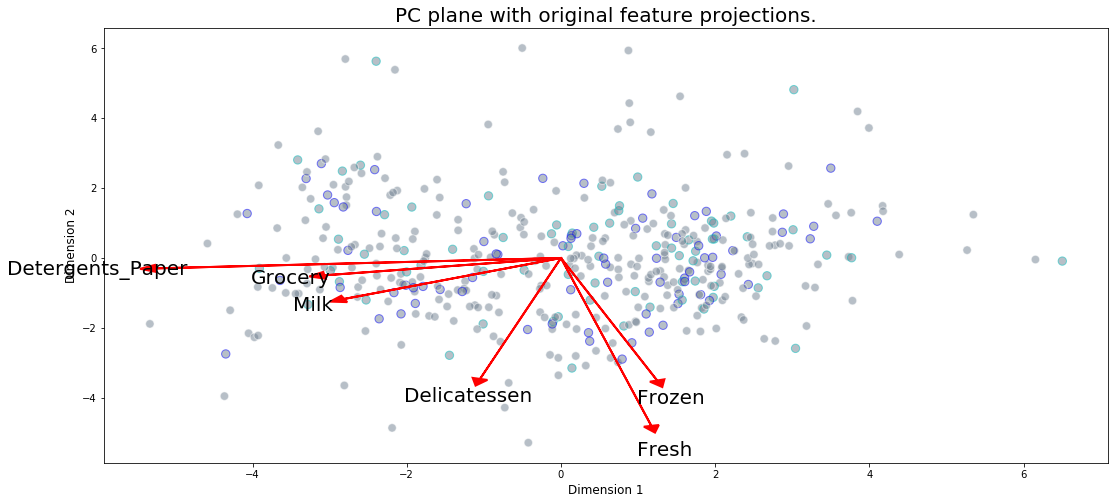

In [14]:
def biplot(good_data, reduced_data, pca):
    fig, ax = plt.subplots(figsize = (18, 8))
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='slategrey', edgecolors='1b2c45', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=20)

    ax.set_xlabel("Dimension 1", fontsize=12)
    ax.set_ylabel("Dimension 2", fontsize=12)
    ax.set_title("PC plane with original feature projections.", fontsize=20);
    return ax
# Create a biplot
biplot(good_data, reduced_data, pca);

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
- Quais são as vantagens de utilizar o algoritmo de clustering K-Means?
- Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano?
- Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.

**Dica: **Pense na diferença entre os clusters mais próximos ou mais isolados.

**Resposta:**
As vantagens do K-means de clusteriazação em comparação com o modelo Gaussiano de clusterização está atrelado a simplicidade e a velocidade. K-means mantem apenas clusteres centrais e será muito mais rápido no modelo de treinamento.

As vantagens do modelo Gaussiano são as clalissificações "soft"(indica quão concreto o dado pertence a um cluster) e uma performance boa com diferentes distrubuição de dados. O modelo Gaussiano pode realizar a análise melhor pois possui classificações "soft", mas o K-Means consegue prever corretamente sem uma complexidade adicional no modelo.

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

For number of clusters = 2, the silhouette_score is : 0.42628101546910835
For number of clusters = 3, the silhouette_score is : 0.3889859252483241
For number of clusters = 4, the silhouette_score is : 0.33202253077328764
For number of clusters = 5, the silhouette_score is : 0.35084313892750113
For number of clusters = 6, the silhouette_score is : 0.36500142036444017
For number of clusters = 7, the silhouette_score is : 0.36350322430458637
For number of clusters = 8, the silhouette_score is : 0.3646079220131161
For number of clusters = 9, the silhouette_score is : 0.3674050928527309
For number of clusters = 10, the silhouette_score is : 0.364358254331125
For number of clusters = 11, the silhouette_score is : 0.34888478287501434
For number of clusters = 2, the silhouette_score is : 0.37615565776759097
For number of clusters = 3, the silhouette_score is : 0.366387385330114
For number of clusters = 4, the silhouette_score is : 0.29131005139852023
For number of clusters = 5, the silhouette_

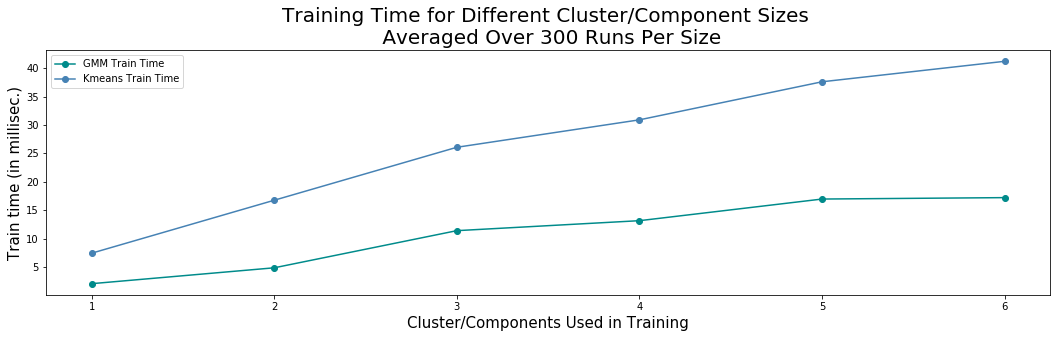

In [15]:

for n in list(range(2,12)):
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer = KMeans(n_clusters=n).fit(reduced_data)

    # TODO: Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)

   # TODO: Ache os centros do cluster
    centers = clusterer.cluster_centers_

   # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score(reduced_data, preds)
    print ("For number of clusters = {}, the silhouette_score is : {}".format(n, score))

for n in list(range(2,12)):
   # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer2 = GaussianMixture(n_components=n, covariance_type='full').fit(reduced_data)

    # TODO: Preveja o cluster para cada ponto de dado
    preds2 = clusterer2.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centers2 = clusterer2.means_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds2 = clusterer2.predict(pca_samples)

   # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score2 = silhouette_score(reduced_data, preds2, metric='mahalanobis')
    print ("For number of clusters = {}, the silhouette_score is : {}".format(n, score2))

print("--------------------------------------")
    
for n in list(range(2,12)):
    clusterer2 = GaussianMixture(n_components=n, covariance_type='full').fit(reduced_data)
    preds2 = clusterer2.predict(reduced_data)
    centers2 = clusterer2.means_
    sample_preds2 = clusterer2.predict(pca_samples)
    score2 = silhouette_score(reduced_data, preds2, metric='mahalanobis')
    print ("For number of clusters = {}, the silhouette_score is : {}".format(n, score2))
    
n = 300
k = 6

kmeans_train_times = []
for k in range(1, 7):
    cum_time = 0.
    for i in range(n):
        start = time.time()
        KMeans(n_clusters=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    kmeans_train_times.append([k, train_time])

km_df = pd.DataFrame(kmeans_train_times, columns=['KM_Clusters', 'KM_Time'])

gmm_train_times = []
for k in range(1, 7):
    cum_time = 0.
    for i in range(n):
        start = time.time()
        GaussianMixture(n_components=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    gmm_train_times.append([k, train_time])

gmm_df = pd.DataFrame(gmm_train_times, columns=['GMM_Components', 'GMM_Time'])
times_df = km_df.join(gmm_df)

plt.figure(figsize=(18,4.5))
plt.plot(times_df.GMM_Components, times_df.GMM_Time * 1000., 
         '-o', c='darkcyan', label='GMM Train Time')
plt.plot(times_df.GMM_Components, times_df.KM_Time * 1000., 
         '-o', c='steelblue', label='Kmeans Train Time')
plt.legend(loc='best')
plt.ylabel('Train time (in millisec.)', fontsize=15)
plt.xlabel('Cluster/Components Used in Training', fontsize=15)
plt.title('Training Time for Different Cluster/Component Sizes \n Averaged Over {} Runs Per Size'\
          .format(n), fontsize=20);

### Questão 7
- Reporte o coeficiente de silhueta para vários números de cluster que você tentou.
- Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?

**Resposta:**
Acima estão as análises feitas que podem ser usadas para resposta da questão 7. Podemos ver que as maiores notas no caso de dois clusters para ambos os algoritmos. Deve-ser então ser uma escolha nossa.

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

K-Means
Gaussian Mixture Model


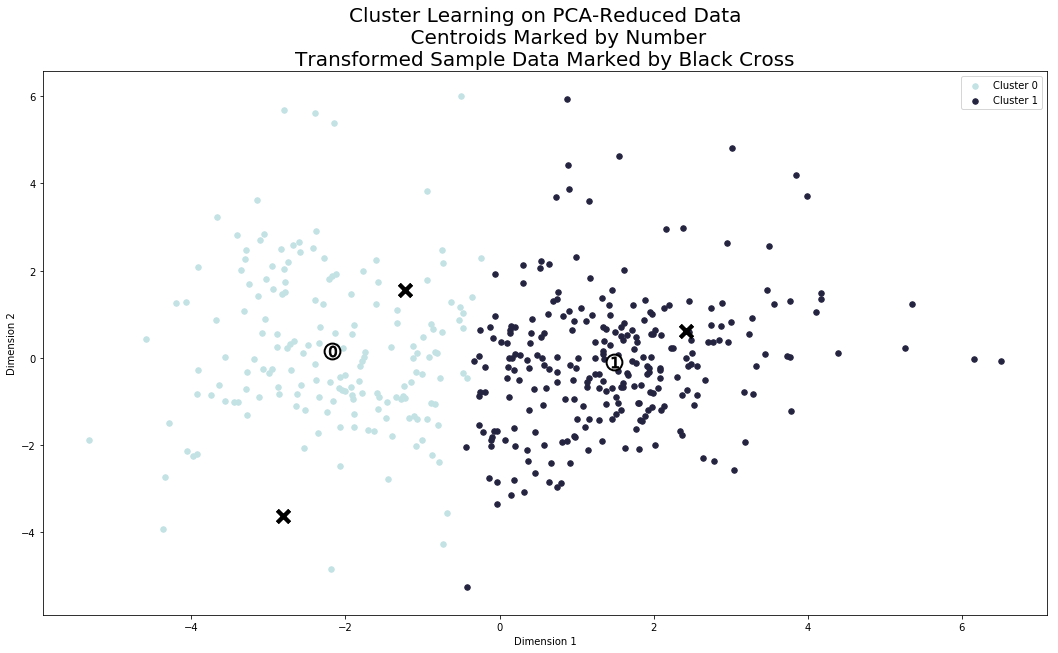

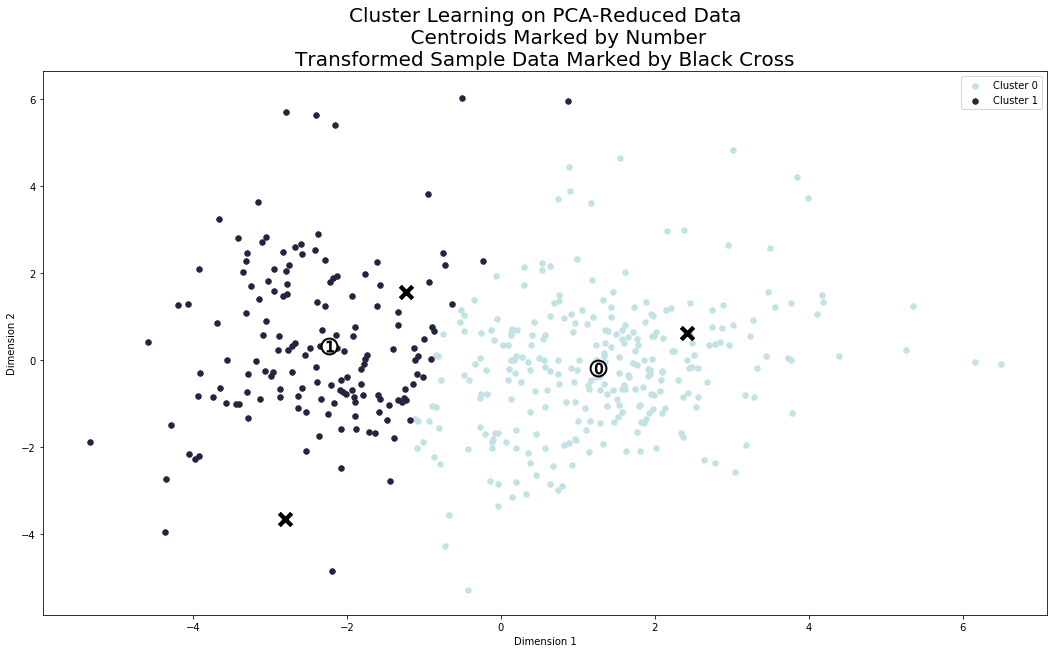

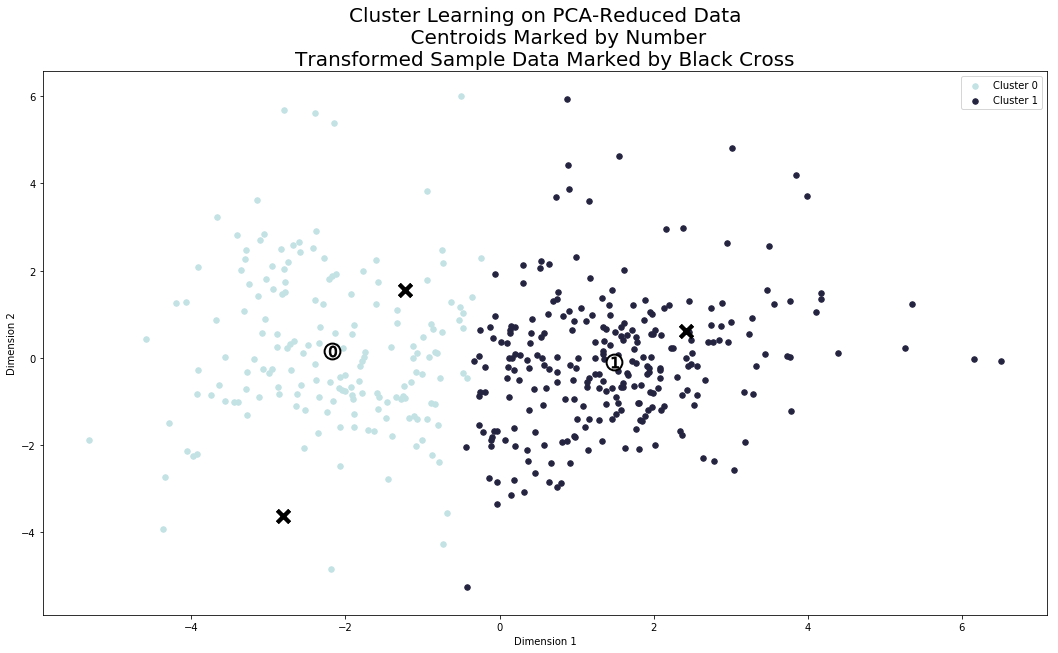

In [24]:
import seaborn as sns
from sklearn.mixture import GaussianMixture

def cluster_results(reduced_data, preds, centers, pca_samples):

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (18,10))

    # Color map
    cmap = sns.cubehelix_palette(2, start=0.1, rot=-.25, as_cmap=True)

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=250);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=120, color='black');
    # Plot transformed sample points 
        ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
                   s = 150, linewidth = 4, color = 'black', marker = 'x');

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data\n\
    Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross", fontsize=20);

# MOdelo K-means para 2 clusters
clusterer = KMeans(n_clusters=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

cluster_results(reduced_data, preds, centers, pca_samples)
print ("K-Means")

# Modelo Gaussiano
clusterer2 = GaussianMixture(n_components=2, covariance_type='full').fit(reduced_data)
preds2 = clusterer2.predict(reduced_data)
centers2 = clusterer2.means_
sample_preds2 = clusterer2.predict(pca_samples)
score2 = silhouette_score(reduced_data, preds2)

cluster_results(reduced_data, preds2, centers2, pca_samples)
print('Gaussian Mixture Model')

def cluster_results(reduced_data, preds, centers, pca_samples):
    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    fig, ax = plt.subplots(figsize = (18,10))

    cmap = sns.cubehelix_palette(2, start=0.1, rot=-.25, as_cmap=True)

    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=250);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=120, color='black');
        ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
                   s = 150, linewidth = 4, color = 'black', marker = 'x');

    ax.set_title("Cluster Learning on PCA-Reduced Data\n\
    Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross", fontsize=20);

# Mostre os resultados do clustering da implementação
cluster_results(reduced_data, preds, centers, pca_samples)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


Data Means


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


K-Means


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4005.0,7900.0,12104.0,952.0,4561.0,1036.0
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0


Gaussian Mixture Model


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


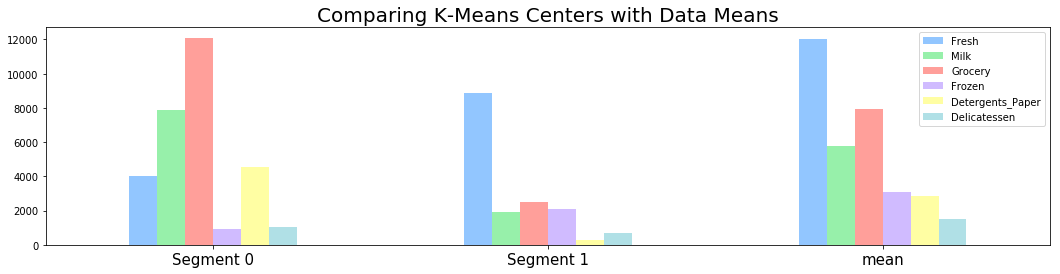

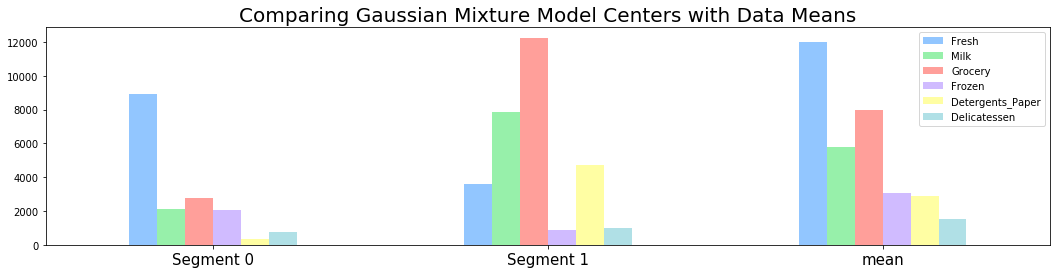

In [25]:
print ("Data Means")
display(pd.DataFrame(np.mean(data)).T)

print ("K-Means")
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)


segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

true_centers = true_centers.append(data.describe().ix['mean'])
true_centers.plot(kind = 'bar', figsize = (18, 4))
plt.xticks(rotation=0, fontsize=15)
plt.title('Comparing K-Means Centers with Data Means', fontsize=20);

print ("Gaussian Mixture Model")
# TODO: Transforme inversamento os centros
log_centers2 = pca.inverse_transform(centers2)

# TODO: Exponencie os centros
true_centers2 = np.exp(log_centers2)


segments2 = ['Segment {}'.format(i) for i in range(0,len(centers2))]
true_centers2 = pd.DataFrame(np.round(true_centers2), columns = data.keys())
true_centers2.index = segments2
display(true_centers2)

true_centers2 = true_centers2.append(data.describe().ix['mean'])
true_centers2.plot(kind = 'bar', figsize = (18, 4))
plt.xticks(rotation=0, fontsize=15)
plt.title('Comparing Gaussian Mixture Model Centers with Data Means', fontsize=20);

### Questão 8
- Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?

**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`. Pense no que cada segmento representa em termos do ponto de atributo escolhido.

**Resposta:**

Os valores nas categorias são excelentes indicadores.

'Detergents_Paper', 'Grocery', 'Milk', 'Delicatessen' são maiores que a média por Retail e manor que a média por Hotel/Restaurante/cafe.
'Fresh' tem o maior nível entre outros por Hotel/Restaurante/Cafe do que Retail
'Detergents_Paper' tem um nivel extramamente menor para Hotel/Restaurante/Cafe

K-means:
Segmento 1: HOtel/Restaurante/Cafe
Segmento 0: Retail

Modelo Gaussiano:
Segmento 1: HOtel/Restaurante/Cafe
Segmento 0: Retail

### Questão 9
- Para cada amostra de ponto, qual segmento de cliente da **Questão 8** é melhor representado?
- As previsões para cada amostra de ponto são consistentes com isso?

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [21]:
# Mostre as previsões
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 3
Sample point 2 predicted to be in Cluster 5


**Resposta:**

Os clientes C0 e C1 estão em Retail, C2 em Hotel/Restaurante/Cafe

Minhas opiniões no início do projeto sobre o segmento que cada cliente estava estão de acordo com as previsões:

C0 - mostra comportamentos próximos do centro do CLuester 0. somente os volumes de comprar são mais significativo

C1 - tem valores bem próximos do centro do cluster 0 em todas as categorias

C2 - mostra o comportamento pŕóximo ao centro do cluester 1

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente.
- Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?

**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:**

SE nós reduzirmos a frequencia de entrega de Retail, toran-se possível uma reação positiva. Eles nao pedem muita comida fresca, isto pode reduzir o custo com transporte, assim, os gastos são mais previsíveis e regulares. No entanto, algumas reações poderiam ser negativas: muitos supermercados tentam minimizar o inventário para economizar gastos. Os clientes em Hotel/Cafe/Restaurantes podem reagir positivamente se eles tiverem lugares suficientes para economizar comida. Mas o ponto negativo seria: alguns deles não possuem espaço suficiente para economizar, mas eles precisam de comida fresca para seus negócios. Para ambos os segmentos, um efeito negativo é possível. Somente um teste A/B pode detectar se é de fato verdadeiro.

Podemos realizar os testes A/B com amostrar aleatórias em cada cluster. é possível ter tendencias totalmente diferentes nos resultados dos testes. Um segmento poderia ter um efeito significante, o outro poderia não demonstrar nada. Os habitos de gastos deles não são similares. Se misturarmos eles, podemos perder informações sobre os efeitos reais.

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
- Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de **segmentação de clientes**.

**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:**

Existem varias maneiras para melhorar as previsões analíticas dos labels:
- Algoritmos de aprendizado supervisionado para detectar diferenças entre clusters, labels de clusters podem ser somente um alvo de previsão de modelos para novos pontos de dados.
- Os Algoritmos de clusterização K-Maens e GMMs atualizados para os novos pontos de dados para inclui-los em certos clusters.

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

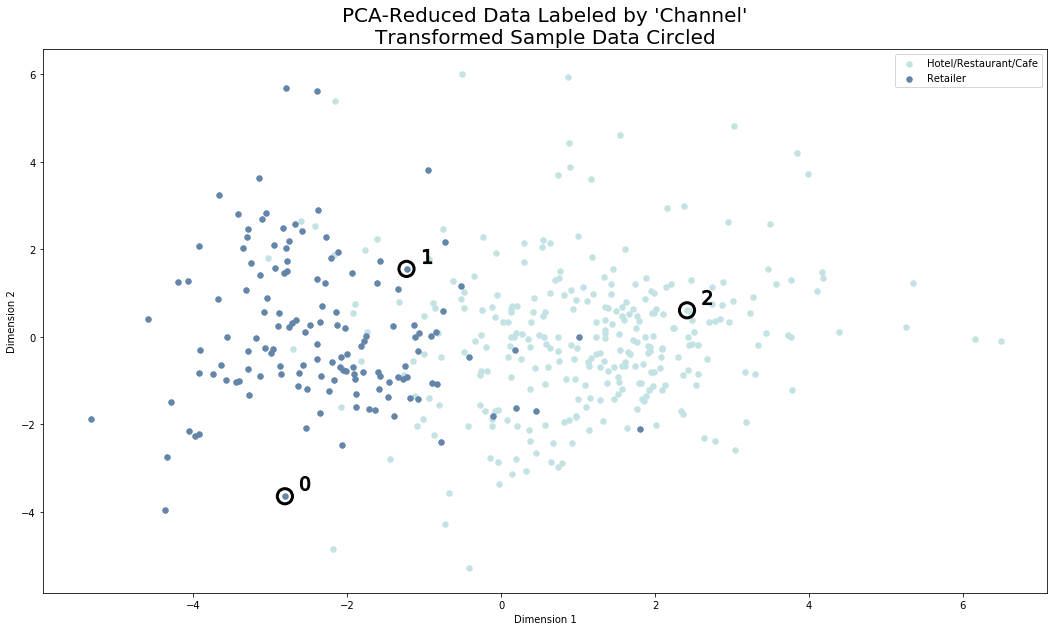

In [22]:
import seaborn as sns

def channel_results(reduced_data, outliers, pca_samples):
    try:
        full_data = pd.read_csv("customers.csv")
    except:
        print ("Dataset could not be loaded. Is the file missing?")
        return False

    channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
    channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
    labeled = pd.concat([reduced_data, channel], axis = 1)

    fig, ax = plt.subplots(figsize = (18,10))

    cmap = sns.cubehelix_palette(2, start=0.1, rot=-.25, as_cmap=True)

    labels = ['Hotel/Restaurant/Cafe', 'Retailer']
    grouped = labeled.groupby('Channel')
    for i, channel in grouped:   
        channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                     color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
   
    for i, sample in enumerate(pca_samples):
        ax.scatter(x = sample[0], y = sample[1], \
                   s = 230, linewidth = 3, color = 'black', 
                   marker = 'o', facecolors = 'none');
        ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), 
                   alpha = 1, s=200, color='black');

    ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled", fontsize=20);

# Mostre os resultados do clustering baseado nos dados do 'Channel'
channel_results(reduced_data, outliers, pca_samples)

### Questão 12
- Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista?
- Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição?
- Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:**

O número de clusters é consistente com a distribuição grifada. Ambos os algoritmos de clusterização trabalham o suficientemente bem. Como pode-se ver a simplicidade do K-Means não faz efeito em eficiencias nesse caso.

Os segmentos do cliente classificam como puramente "Retailers" ou "Hotel/Cafe/Restaurantes" do lado esquerdo e do direito respectivamente.

O algoritmo de classificação na maioria dos casos está de acordo com os resultados reais. Deve-se perceber que para ambos os algoritmos, as periferias dos clusters são calaramente detectaveis.

Diferenças entre o real e o algoritmo podem indicar uma falta de numero de clusters para esse mercado. Talvez precise de um numero maior para detectar hábitos de gastos.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.